# 필요환경 구축

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="white", color_codes=True)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel("ERROR")


In [2]:
iris = pd.read_csv("input/iris - iris.csv")
iris.head()

,Id,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
X.sample(5)
y.sample(5)

64     Versicolor
99     Versicolor
144     Virginica
27         Setosa
40         Setosa
Name: variety, dtype: object

# Data Scaling

In [4]:
X.head(5)

,Id,sepal.length,sepal.width,petal.length
0,0,5.1,3.5,1.4
1,1,4.9,3.0,1.4
2,2,4.7,3.2,1.3
3,3,4.6,3.1,1.5
4,4,5.0,3.6,1.4


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array,columns = X.columns)

X_scaled.head()

,Id,sepal.length,sepal.width,petal.length
0,-1.720542,-0.900681,1.019004,-1.340227
1,-1.697448,-1.143017,-0.131979,-1.340227
2,-1.674353,-1.385353,0.328414,-1.397064
3,-1.651258,-1.506521,0.098217,-1.283389
4,-1.628164,-1.021849,1.249201,-1.340227


# K-means clustering on Iris Dataset No answer

In [7]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters = nclusters, random_state = seed)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# 군집화 성능을 알아보기위해 실루엣 함수 사용한다.
from sklearn import metrics
score = metrics.silhouette_score(X_scaled,y_cluster_kmeans)
score
# 값은 0.42가 나오지만 0에 가깝기때문에 잘 안된것

0.4277160166394873

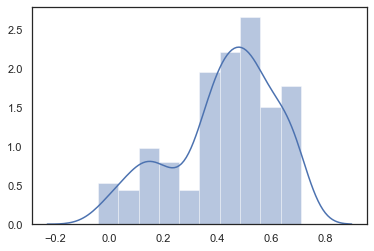

In [12]:
scores = metrics.silhouette_samples(X_scaled,y_cluster_kmeans)
# 클러스터링 정규화 분포값을 파악하기위해 나타낸다.
sns.distplot(scores)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029179DED0F0>,
      dtype=object)

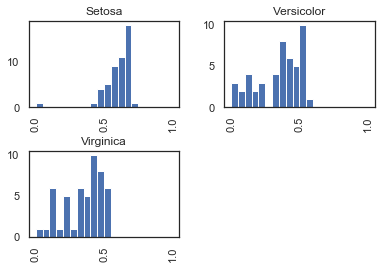

In [15]:
# 각 꽃에대한 분포
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['variety'] = iris['variety']
df_scores.hist(by='variety', column = 'SilhouetteScore',range = (0,1.0),bins = 20)
# 범위는 정규화 값이기때문에 0~1사이 1.0이 가까운 형태로 보면 좋지만 여기있는 데이터는 잘 나타내질 못함

# Kmeans clustering Answer
정답에 근접하게 매핑하기

이때 사용하는 것이 Rand Index

Rand Index는 2개의 쌍을 제공한다.

추정을 통해서 값을 맵핑 정답이 아님 추정하는것

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y,y_cluster_kmeans)
score


0.7222043170868028

# Principal Component Analysis

시각적으로 표현하기 위해 구현

In [18]:
from sklearn.decomposition import PCA
ndimension = 2

pca = PCA(n_components = ndimension, random_state = seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array,columns=['PC1','PC2'])
X_pca.sample(5)
# len(X_pca)

150

# PCA 와 Kmeans 데이터 연결

In [20]:
y_id_array = pd.Categorical(iris['variety']).codes

df_plot = X_pca.copy()
# df_plot['ClusterKmeans'] = y_cluster_kmeans # 예측 카테고리
df_plot['varietyId'] = y_id_array # 정답 카테고리
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,varietyId
82,0.356959,-0.757644,2,1
37,-2.219042,0.543942,0,0
83,0.893778,-0.609462,2,1
147,1.853817,0.293990,1,2
102,1.888262,0.614948,1,2


In [21]:
# 시각화

def plotData(df, groupby):
#     scatter plot을 구현한다
#  서브플랏형태로 구현한다 
    fig, ax = plt.subplots(figsize =(7, 7))
    
    cmap = mpl.cm.get_cmap('prism')
    
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                    kind = 'scatter',
                    x = 'PC1',
                    y = 'PC2',
                    color = cmap(i/(nclusters - 1)),
                    label = "%s %i" %(groupby,i),
                    s = 30)
        
    ax.grid()
    ax.axhline(0, color="black")
    ax.axvline(0, color="black")
    ax.set_title("Principal Component Analysis (PCA) of Iris Dataset")
    

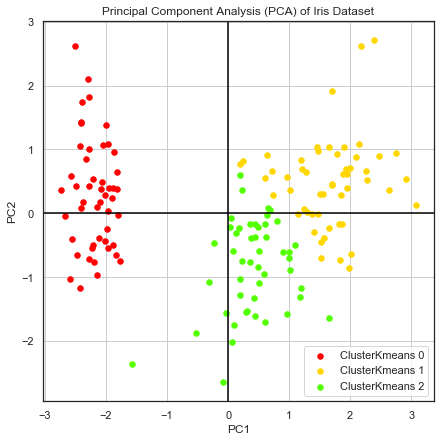

In [22]:
plotData(df_plot,'ClusterKmeans')

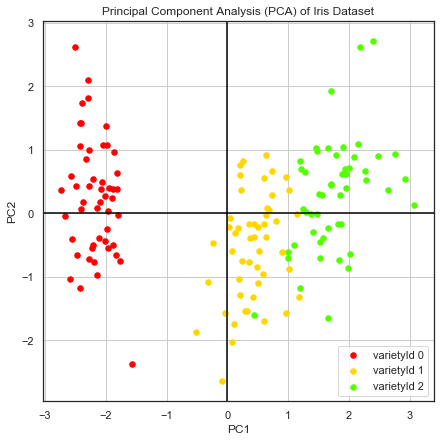

In [23]:
plotData(df_plot,'varietyId')
# 클러스터링이 다르게 될수 있음

# Gaussian mixture clustering

In [27]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = nclusters)
gmm.fit(X_scaled)

y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

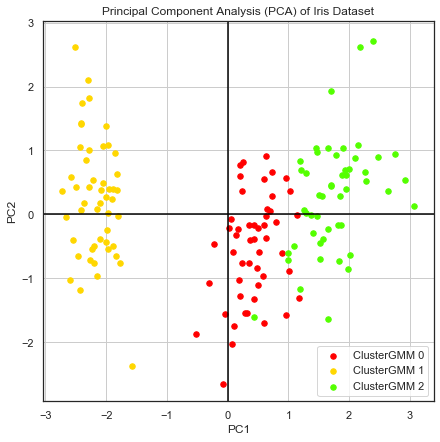

In [28]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [29]:
# Kmeans vs GMM
score_kmeans = adjusted_rand_score(y,y_cluster_kmeans)
score_gmm = adjusted_rand_score(y,y_cluster_gmm)
print(score_kmeans,score_gmm)

0.7222043170868028 1.0
